# Introduction

## I attached a beginner guide article that explains how to play TFT.
## How to play TFT: [beginner guide](https://mobalytics.gg/blog/tft-guide/)

## A TFT synergies cheat sheet found from mobalytics.gg for reference if you are not familiar with TFT. This includes 10 origins and 13 classes in set 3 which matches this dataset. (open as a new tab/window for full-size picture)
## A TFT items cheat sheet that includes all basic and crafting items
## Synergies cheat sheet: [Synergies Cheat Sheet](https://app.mobalytics.gg/tft/set3/team-comps)
## Items cheat sheet: [TFT Galaxies Item Cheat Sheet](https://thegamehaus.com/teamfight-tactics/tft-galaxies-item-cheat-sheet/2020/03/03/)

![synergies](https://mobalytics.gg/wp-content/uploads/2020/03/image-3.png)
![items](https://i0.wp.com/thegamehaus.com/wp-content/uploads/2020/03/TFT-Item-Build-List-Set-3.png?w=880&ssl=1)

# Let's see how high elo players actually play TFT

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Master Rank

## Load in TFT_Master_MatchData

In [ ]:
master_df = pd.read_csv("/kaggle/input/tft-match-data/TFT_Master_MatchData.csv")
master_df.head(8)

## How long would a master game usually took?

In [ ]:
time_last = master_df[['gameId','gameDuration']].drop_duplicates().gameDuration.agg(['min','mean','max']).to_frame()
time_last.gameDuration = time_last.gameDuration.apply(lambda x: round(x / 60))
time_last.rename(columns = {'gameDuration' : 'gameDuration (min)'},inplace=True)
time_last

In [ ]:
px.bar(time_last,x=time_last.index,y=time_last.values,labels={'x':'Aggregate Function','y':'Time (Minutes)'},title='Game Duration Time')

- In average, a master game usually last for 36 minutes
- The shortest game was 3 minutes, while the longest was 46 minutes

## What combinations master players used the most?

In [ ]:
from collections import Counter
import re

class_and_origin = master_df.combination.apply(lambda x: re.findall(r'[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
result = Counter()
for data in class_and_origin.combination:
    result += Counter(data)

result = pd.DataFrame.from_dict(result,orient='index',columns=['Count']).sort_values('Count')
result

In [ ]:
fig = px.bar(result,x='Count',y=result.index,color=result.index,labels={'y':'Combination'},title='Synergies Combination Usage',orientation='h',height=1000)
fig.layout.update(showlegend=False)
fig.show()

- `Chrono` was the most used origin
- `Chrono`,`Cybernetic`,`Vanguard` were top 3 most common origins & classes

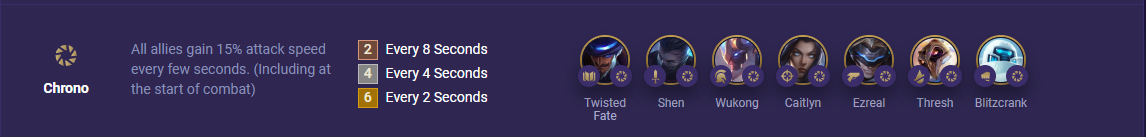
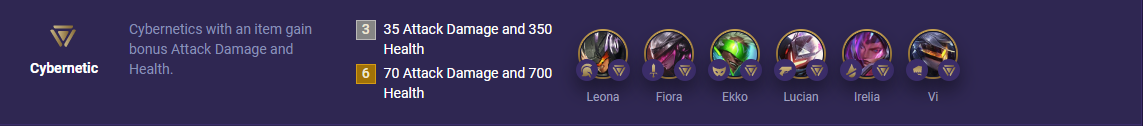
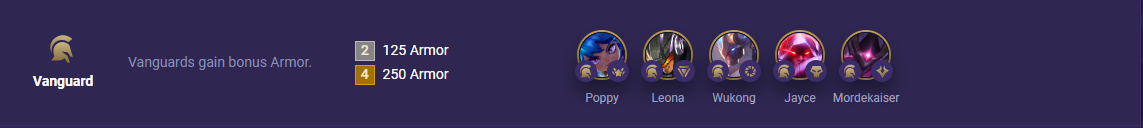


## What combinations usually scored in top 3?

In [ ]:
class_and_origin_top = master_df[master_df.Ranked <= 3].combination.apply(lambda x: re.findall(r'[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
result = Counter()
for data in class_and_origin_top.combination:
    result += Counter(data)

result = pd.DataFrame.from_dict(result,orient='index',columns=['Count']).sort_values('Count')
result

In [ ]:
fig = px.bar(result,x='Count',y=result.index,color=result.index,labels={'y':'Combination'},title='Synergies Combination Usage Among Top 3',orientation='h',height=1000)
fig.layout.update(showlegend=False)
fig.show()

- `Chrono`,`Cybernetic` still remained the top picks
- `DarkStar` replaced `Vanguard` and became the 3rd place

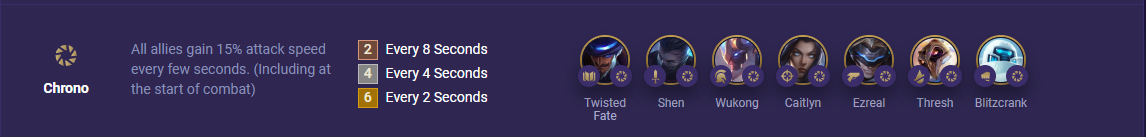
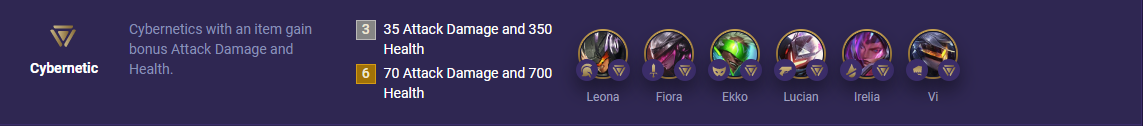
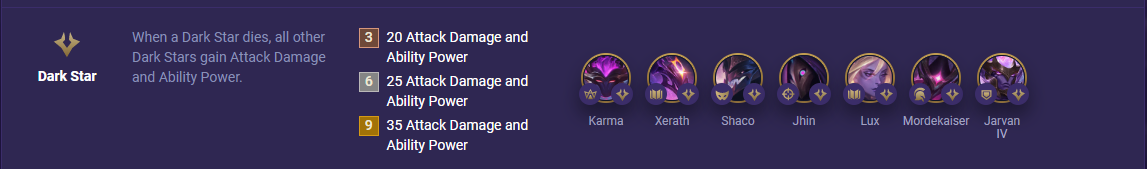

### Section Summary: 
### - Master players favored champions belong to `Chrono`,`Cybernetic`,`Vanguard`,`Dark Star`
### - `Chrono`,`Cybernetic`,`Dark Star` had greater potential to secure top 3 ranks in a master game

## What exact combinations were used instead of counting separately?

In [ ]:
popular_comp = master_df.combination.value_counts().to_frame()

popular_comp.head(5)

- It looked like top 4 combinations all revolved around `Blaster` class
- First combination appeared `3003` times which was 1738 times more than the 2nd place

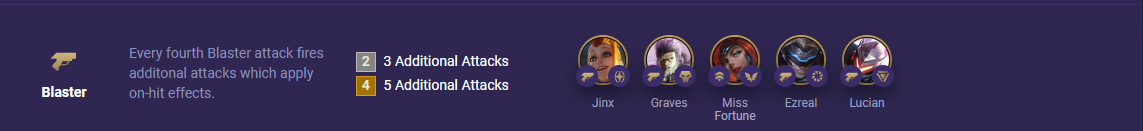

## How about combinations scored top 3 ranks in the game?

In [ ]:
top_comp = master_df[master_df.Ranked <= 3].combination.value_counts().to_frame()
top_comp.head()

- Top 2 combinations appeared `903`,`834` times, way higher than the rest

## Update soon...